In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import os
from dotenv import load_dotenv
import time
from collections import Counter
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPooling2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing import image as IMG

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [160]:
# # (X_train, X_test,y_train,y_test)
# with open('image_data_array.pickle','rb') as file:
#     data = pickle.load(file)

# X_train, X_test,X_val,y_train,y_test,y_val = data[0],data[1],data[2],data[3],data[4],data[5]

# #Split data into train and validation set
# #X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state = 17,shuffle =True,test_size =.2)

# y_train_hotcode = keras.utils.to_categorical(y_train)
# y_val_hotcode = keras.utils.to_categorical(y_val)
# y_test_hotcode = keras.utils.to_categorical(y_test)

In [9]:
test_dir = "work_data/test"
val_dir = "work_data/validation"
train_dir = "work_data/train"

#### Data Augment and CNN

In [10]:
IMG_SIZE =150

In [11]:
IMGgen = IMG.ImageDataGenerator(
        rotation_range=60,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
train_ds =IMGgen.flow_from_directory(train_dir, target_size=(IMG_SIZE, IMG_SIZE),batch_size=32)

val_ds = IMGgen.flow_from_directory(val_dir, target_size=(IMG_SIZE, IMG_SIZE),batch_size=32)

In [150]:
test_ds = keras.utils.image_dataset_from_directory(
                            test_dir,
                            label_mode= 'categorical',
                            batch_size=1, 
                            image_size=(IMG_SIZE,IMG_SIZE), 
                            shuffle=False, 
                            seed=None)

Found 1379 files belonging to 8 classes.


In [23]:
if os.path.exists("cnn_model_direcotry.h5") == False:
    ### basic CNN model
    cnn = Sequential()


    cnn.add(InputLayer(input_shape= (IMG_SIZE,IMG_SIZE,3)))

    cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Flatten())

    cnn.add(Dense(64, activation='relu'))
    cnn.add(Dropout(0.2))
    cnn.add(Dense(8, activation='softmax'))  # 10 target classes
    
#     class MyLRSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

#         def __init__(self, initial_learning_rate):
#             self.initial_learning_rate = initial_learning_rate

#         def __call__(self, step):
#              return self.initial_learning_rate / (step + 1)

#     optimizer = tf.keras.optimizers.Adam(learning_rate=MyLRSchedule(0.1))
    
    

    cnn.compile(
        #loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        loss ='categorical_crossentropy',
        #optimizer= keras.optimizers.Adam(learning_rate=0.01),
        #optimizer = optimizer,
        optimizer = 'Adam',
        metrics=['accuracy'],
    )
    cnn.summary()
    
    
    
    cnn_callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]


    cnn_result = cnn.fit(train_ds,
                         validation_data= val_ds,
                         epochs=200, 
                         verbose=1, batch_size = 32,
                         callbacks = tf.keras.callbacks.EarlyStopping(patience=10))  # track progress as we fit

    cnn.save("cnn_model_direcotry.h5")
    
    with open('cnn_result_directory.pickle','wb')as file:
        pickle.dump(cnn_result, file)

else: 
    cnn = keras.models.load_model('cnn_model_direcotry.h5')
    
    with open('cnn_result_directory.pickle','rb') as file:
        cnn_result = pickle.load(file)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 128)     

130/130 [==============================] - 91s 701ms/step - loss: 1.3731 - accuracy: 0.4757 - val_loss: 1.3862 - val_accuracy: 0.4677
Epoch 42/200
130/130 [==============================] - 92s 708ms/step - loss: 1.3825 - accuracy: 0.4759 - val_loss: 1.4391 - val_accuracy: 0.4329
Epoch 43/200
130/130 [==============================] - 91s 702ms/step - loss: 1.3554 - accuracy: 0.4786 - val_loss: 1.4290 - val_accuracy: 0.4583
Epoch 44/200
130/130 [==============================] - 95s 729ms/step - loss: 1.3577 - accuracy: 0.4815 - val_loss: 1.3794 - val_accuracy: 0.4757
Epoch 45/200
130/130 [==============================] - 92s 708ms/step - loss: 1.3538 - accuracy: 0.4868 - val_loss: 1.4047 - val_accuracy: 0.4532
Epoch 46/200
130/130 [==============================] - 91s 697ms/step - loss: 1.3356 - accuracy: 0.4873 - val_loss: 1.4413 - val_accuracy: 0.4677
Epoch 47/200
130/130 [==============================] - 91s 696ms/step - loss: 1.3515 - accuracy: 0.4832 - val_loss: 1.4009 - val_a

NameError: name 'time1' is not defined

In [27]:
cnn.save("cnn_model_direcotry.h5")
with open('cnn_result_directory.pickle','wb')as file:
    pickle.dump(cnn_result, file)

2022-02-14 18:32:20.219406: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://94950528-b510-479f-a915-9a58b992c915/assets


In [157]:
y_pred= np.argmax(cnn.predict(test_ds),axis =1)
y_test=np.argmax(np.array([data[1].numpy()[0].tolist() for data in test_ds]),axis =1)

In [158]:
print("accuracy :",accuracy_score(y_test, y_pred))
print('recall :',recall_score(y_test,y_pred,average = 'macro'))
print('precision :', precision_score(y_test,y_pred,average = 'macro'))
print('f1 :', f1_score(y_test,y_pred,average = 'macro'))

accuracy : 0.5134155184916607
recall : 0.4579116561516332
precision : 0.5946051549115128
f1 : 0.49711611866876876


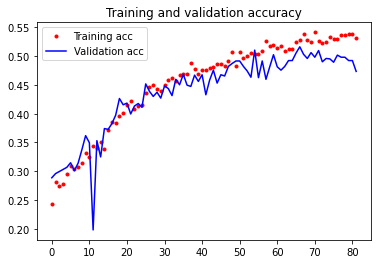

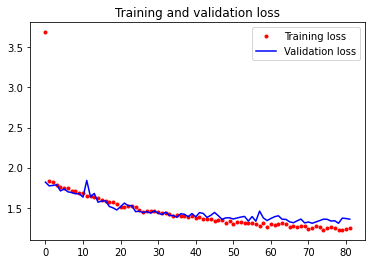

In [28]:
acc = cnn_result.history['accuracy']
val_acc = cnn_result.history['val_accuracy']
loss = cnn_result.history['loss']
val_loss = cnn_result.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r.', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
category_int_map = {'Gasoline Can': 0,
                     'Hammer': 1,
                     'Screw Driver': 4,
                     'Wrench': 6,
                     'Rope': 3,
                     'Pebbels': 2,
                     'Toolbox': 5,
                     'pliers': 7}
int_category_map = {0: 'Gasoline Can',
                     1: 'Hammer',
                     4: 'Screw Driver',
                     6: 'Wrench',
                     3: 'Rope',
                     2: 'Pebbels',
                     5: 'Toolbox',
                     7: 'pliers'}

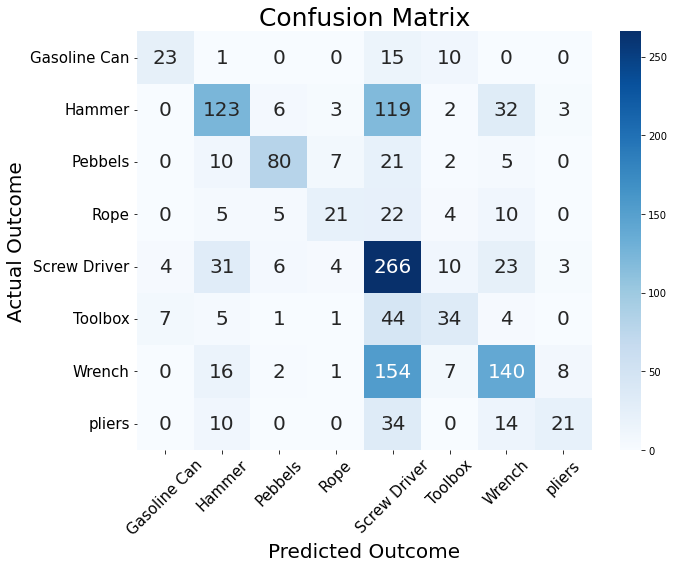

In [159]:
plt.figure(figsize=(10,8))
#plt.subplot(131)
ax = sns.heatmap(confusion_matrix(y_test,y_pred),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")

plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = [ int_category_map.get(key) for key in sorted(int_category_map.keys())]
ax.set_xticklabels(labels, size=15,rotation = 45)
ax.set_yticklabels(labels, size=15,rotation = 0)
plt.tight_layout()
plt.show();